In [ ]:
import tensorflow as tf

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-26 13:58:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  38.3MB/s    in 4.7s    

2022-12-26 13:58:53 (34.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
traing_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                           target_size=IMAGE_SHAPE,
                                                           batch_size=BATCH_SIZE,
                                                           class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMAGE_SHAPE,
                                             batch_size =BATCH_SIZE,
                                             class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name+"/"+experiment_name+"/" + datetime.datetime.now().strftime("%Y")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
resnet_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficientnet_url="https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

mobilenet_url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
IMAGE_SHAPE + (3,)

(224, 224, 3)

In [ ]:
def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,))
  model = tf.keras.models.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
      
  ])
  return model

In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data_10_percent.num_classes)

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/tesnet50V2/
Epoch 1/5
24/24 [==============================] - 38s 1s/step - loss: 1.8935 - accuracy: 0.3733 - val_loss: 1.1795 - val_accuracy: 0.6384
Epoch 2/5
24/24 [==============================] - 18s 770ms/step - loss: 0.8889 - accuracy: 0.7547 - val_loss: 0.8435 - val_accuracy: 0.7416
Epoch 3/5
24/24 [==============================] - 17s 719ms/step - loss: 0.6222 - accuracy: 0.8320 - val_loss: 0.7297 - val_accuracy: 0.7732
Epoch 4/5
24/24 [==============================] - 17s 720ms/step - loss: 0.4756 - accuracy: 0.8880 - val_loss: 0.7010 - val_accuracy: 0.7764
Epoch 5/5
24/24 [==============================] - 18s 758ms/step - loss: 0.3842 - accuracy: 0.9080 - val_loss: 0.6720 - val_accuracy: 0.7796


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

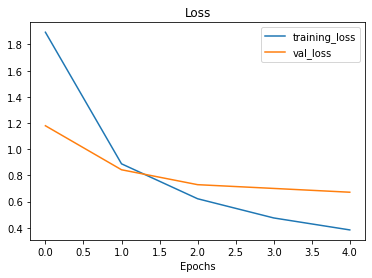

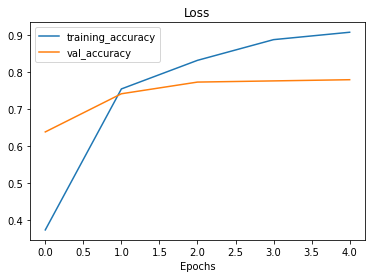

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
efficientnet_model=create_model(efficientnet_url,
             num_classes=train_data_10_percent.num_classes)

In [ ]:
efficientnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [ ]:
efficientnet_history=resnet_model.fit(train_data_10_percent,
                 epochs=5,
                 steps_per_epoch=len(train_data_10_percent),
                 validation_data=test_data,
                 validation_steps=len(test_data),
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                        experiment_name="effecientnet"
                                                        )])

Saving TensorBoard log files to: tensorflow_hub/effecientnet/
Epoch 1/5
24/24 [==============================] - 17s 715ms/step - loss: 0.2584 - accuracy: 0.9587 - val_loss: 0.6431 - val_accuracy: 0.7936
Epoch 2/5
24/24 [==============================] - 17s 721ms/step - loss: 0.2226 - accuracy: 0.9693 - val_loss: 0.6326 - val_accuracy: 0.7944
Epoch 3/5
24/24 [==============================] - 16s 704ms/step - loss: 0.1900 - accuracy: 0.9800 - val_loss: 0.6294 - val_accuracy: 0.7932
Epoch 4/5
24/24 [==============================] - 16s 701ms/step - loss: 0.1642 - accuracy: 0.9827 - val_loss: 0.6316 - val_accuracy: 0.7940
Epoch 5/5
24/24 [==============================] - 16s 704ms/step - loss: 0.1472 - accuracy: 0.9867 - val_loss: 0.6189 - val_accuracy: 0.8012


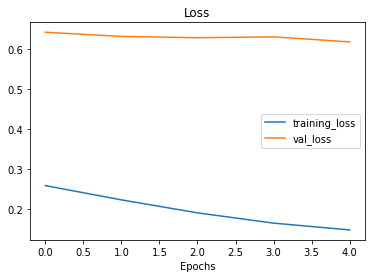

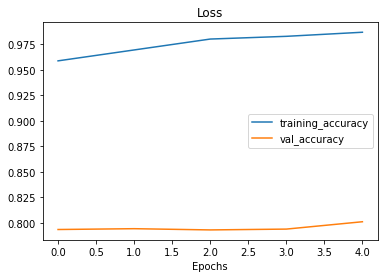

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
mobilenet_model=create_model(mobilenet_url,
             num_classes=train_data_10_percent.num_classes)
mobilenet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])
mobilenet_history=mobilenet_model.fit(train_data_10_percent,
                 epochs=5,
                 steps_per_epoch=len(train_data_10_percent),
                 validation_data=test_data,
                 validation_steps=len(test_data),
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                        experiment_name="mobilenetv2"
                                                        )])

Saving TensorBoard log files to: tensorflow_hub/mobilenetv2/
Epoch 1/5
24/24 [==============================] - 20s 707ms/step - loss: 1.9544 - accuracy: 0.3493 - val_loss: 1.3243 - val_accuracy: 0.5996
Epoch 2/5
24/24 [==============================] - 16s 672ms/step - loss: 1.0345 - accuracy: 0.7253 - val_loss: 0.8939 - val_accuracy: 0.7396
Epoch 3/5
24/24 [==============================] - 16s 672ms/step - loss: 0.7303 - accuracy: 0.8067 - val_loss: 0.7523 - val_accuracy: 0.7772
Epoch 4/5
24/24 [==============================] - 24s 1s/step - loss: 0.5768 - accuracy: 0.8547 - val_loss: 0.7071 - val_accuracy: 0.7852
Epoch 5/5
24/24 [==============================] - 16s 672ms/step - loss: 0.4902 - accuracy: 0.8747 - val_loss: 0.6781 - val_accuracy: 0.7752


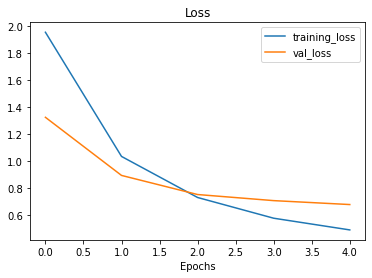

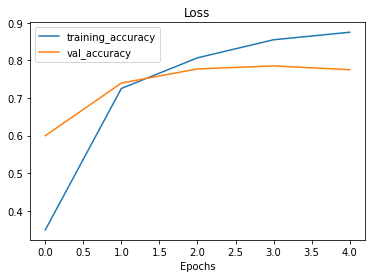

In [ ]:
plot_loss_curves(mobilenet_history)

In [ ]:
mobilenet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EffecientNetB0 vs. ResNet50V2" \
  --description "Comparing EffecientNetB0 and ResNet50V2 on 10% of training data" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=VgFpOhcDOsuylpYm7d2jDYSxjbtkyr&prompt=consent&access_type=off

In [ ]:
!tensorboard dev list

No experiments. Use `tensorboard dev upload` to get started.


In [ ]:
!tensorboard dev delete --experiment_id 9ejlCyiJQKqy7M50yYx6YA

Deleted experiment 9ejlCyiJQKqy7M50yYx6YA.
